### Importing Libraries

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import seaborn as sns

### Data Collection and Analysis

In [127]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('parkinsons.csv')

In [128]:
# Printing the first five rows of the dataframe
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [129]:
# Number of rows and columns in the dataframe
parkinsons_data.shape

(195, 24)

In [130]:
# Getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

### Data preprocessing

In [131]:
# Checking for missing values in each column
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [132]:
# Checking For Duplicate Rows In Dataset

print('duplicated rows are',parkinsons_data.duplicated().sum())

duplicated rows are 0


In [133]:
# Getting some statistical measures about the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [134]:
# Distribution of target Variable
parkinsons_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [135]:
# Dropping The Name Column
parkinsons_data.drop(['name'], axis=1, inplace=True)

### Exploratry Data Analysis

<AxesSubplot:xlabel='status', ylabel='count'>

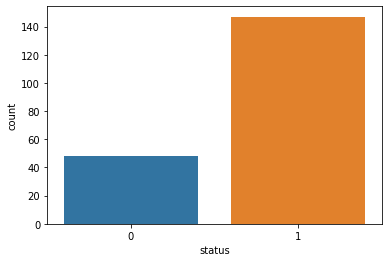

In [136]:
#Balance of Data
sns.countplot(x='status',data=parkinsons_data)

<AxesSubplot:>

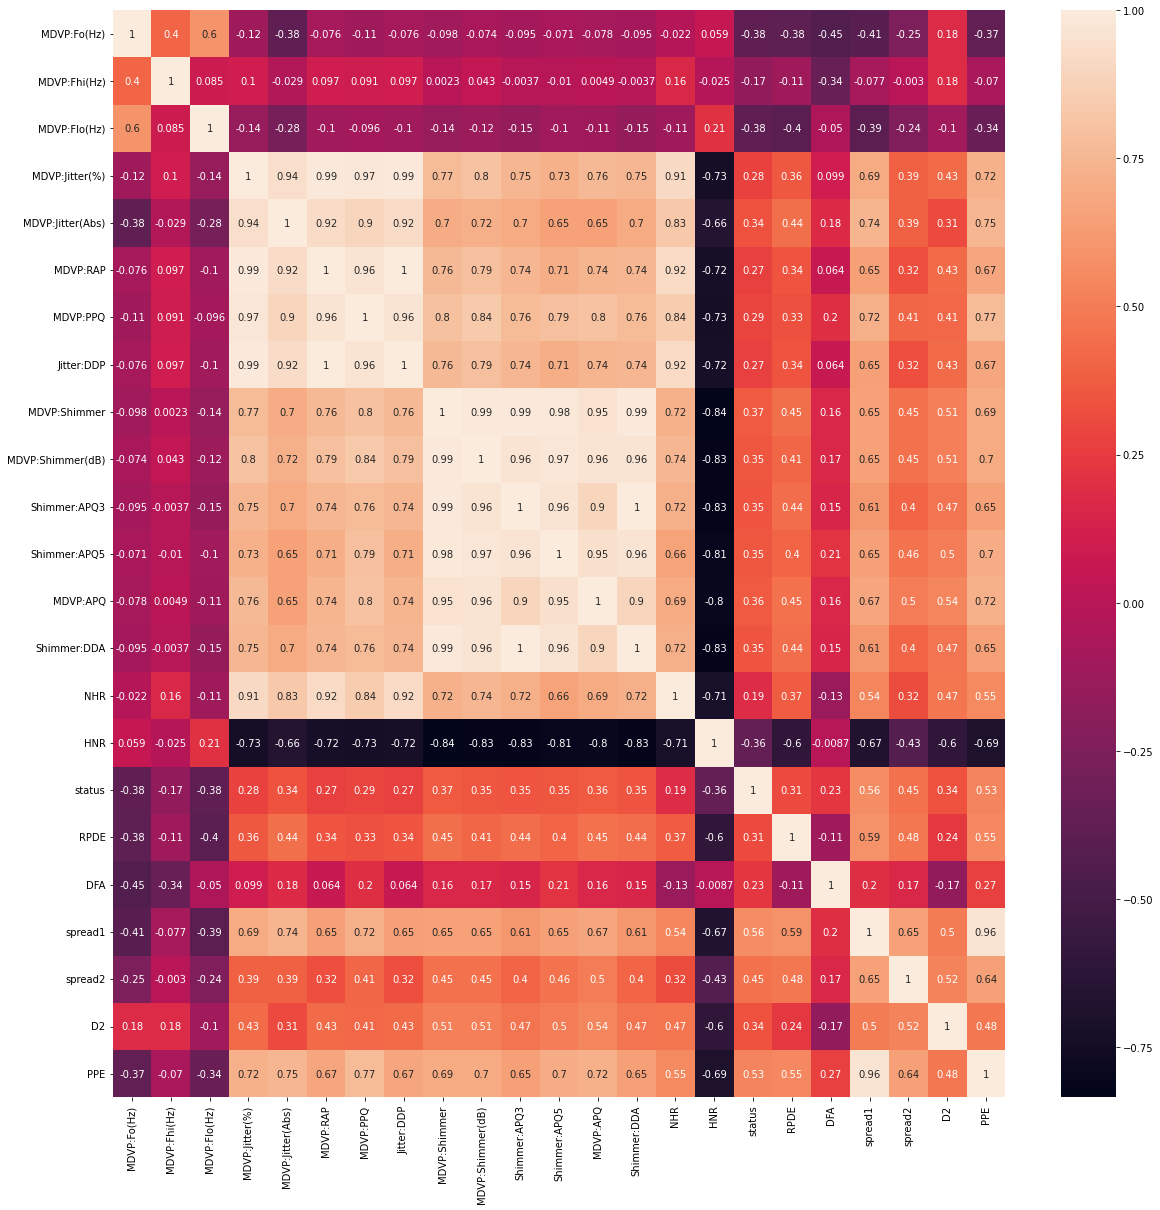

In [137]:
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(parkinsons_data.corr(),annot=True,ax=ax)

### Balancing Dataset

#### In this section, as it is observed that the Dataset Is Heavily Imbalanced, with Number of Samples of Parkinson Disease Samples being 147, and Non-Parkinson Being only 48. Hence, in this section, we make use of SMOTE to Oversample and Balance the dataset

In [138]:
# Exploring Imabalance In Dataset

parkinsons_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [139]:
# Extracting Features Into Features & Target


x = parkinsons_data.drop(['status'], axis=1)
y = parkinsons_data['status']

print('Feature (x) Shape Before Balancing :', x.shape)
print('Target (y) Shape Before Balancing :', y.shape)

Feature (x) Shape Before Balancing : (195, 22)
Target (y) Shape Before Balancing : (195,)


In [140]:
sm = SMOTE(random_state=300)

# Resampling Data

x, y = sm.fit_resample(x, y)

In [141]:
print('Feature (x) Shape After Balancing :', x.shape)
print('Target (y) Shape After Balancing :', y.shape)

Feature (x) Shape After Balancing : (294, 22)
Target (y) Shape After Balancing : (294,)


In [142]:
# Scaling features between -1 and 1  for mormalization 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler((-1,1))

x = scaler.fit_transform(x)
Y = y

In [143]:
# splitting the dataset into traning and testing 
x_train , x_test , y_train , y_test = train_test_split(x, Y , test_size=0.20, random_state=20)

In [144]:
x_train.shape

(235, 22)

In [145]:
x_test.shape

(59, 22)

In [146]:
y_train.shape

(235,)

In [147]:
y_test.shape

(59,)

### Model Building

In [148]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 1.Random Forest Classifier

In [149]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
predRF = rfc.predict(x_test)
print(classification_report(y_test, predRF))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.96      0.85      0.90        26

    accuracy                           0.92        59
   macro avg       0.92      0.91      0.91        59
weighted avg       0.92      0.92      0.91        59



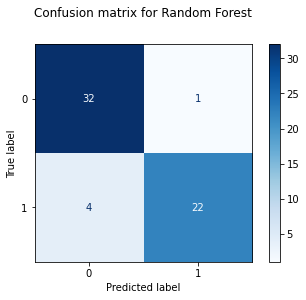

In [150]:
plot_confusion_matrix(rfc, x_test, y_test, cmap=plt.cm.Blues) 
plt.title('Confusion matrix for Random Forest', y=1.1)
plt.show()

### 2.SVM
#### SVM With Linear Kernel

In [151]:
model = svm.SVC(kernel='linear')
# Training the SVM model with training data
model.fit(x_train, y_train)

SVC(kernel='linear')

In [152]:
predsvm = model.predict(x_test)
print(classification_report(y_test, predsvm))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85        33
           1       0.94      0.62      0.74        26

    accuracy                           0.81        59
   macro avg       0.85      0.79      0.80        59
weighted avg       0.84      0.81      0.81        59



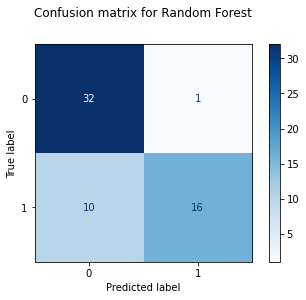

In [153]:
plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues) 
plt.title('Confusion matrix for Random Forest', y=1.1)
plt.show()

### 3.Decision Tree Classifier

In [154]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
predDT = dtc.predict(x_test)
print(classification_report(y_test, predDT))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.86      0.96      0.91        26

    accuracy                           0.92        59
   macro avg       0.91      0.92      0.91        59
weighted avg       0.92      0.92      0.92        59



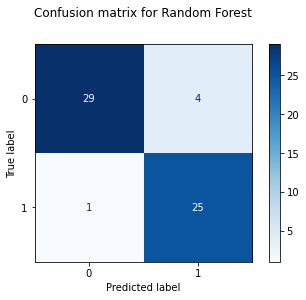

In [155]:
plot_confusion_matrix(dtc, x_test, y_test, cmap=plt.cm.Blues) 
plt.title('Confusion matrix for Random Forest', y=1.1)
plt.show()

### Comparision Table

In [156]:
from sklearn.metrics import precision_score,recall_score ,accuracy_score, f1_score, r2_score, log_loss

chart = {
        'Metric':["Accuracy", "F1-Score", "Recall", "Precision", "R2-Score"],
        'DT':[accuracy_score(y_test, predDT), f1_score(y_test, predDT), recall_score(y_test, predDT), precision_score(y_test, predDT), r2_score(y_test, predDT)],
        'RF':[accuracy_score(y_test, predRF), f1_score(y_test, predRF), recall_score(y_test, predRF), precision_score(y_test, predRF), r2_score(y_test, predRF)],
        'SVM':[accuracy_score(y_test, predsvm), f1_score(y_test, predsvm), recall_score(y_test, predsvm), precision_score(y_test, predsvm), r2_score(y_test, predsvm)],
        }
chart = pd.DataFrame(chart)

In [157]:
display(chart)

,Metric,DT,RF,SVM
0,Accuracy,0.915254,0.915254,0.813559
1,F1-Score,0.909091,0.897959,0.744186
2,Recall,0.961538,0.846154,0.615385
3,Precision,0.862069,0.956522,0.941176
4,R2-Score,0.656177,0.656177,0.243590


### USER INPUT TESTING

In [158]:
a=parkinsons_data.iloc[0].to_dict()               #  parkinson disease-----1
b=parkinsons_data.iloc[1].to_dict()               #  parkinson disease-----1
c=parkinsons_data.iloc[48].to_dict()               #  no parkinson disease-----0
d=parkinsons_data.iloc[49].to_dict()               #  no parkinson disease-----0
e=parkinsons_data.iloc[50].to_dict()               #  no parkinson disease-----0

In [159]:
a.values()

dict_values([119.992, 157.302, 74.997, 0.00784, 7e-05, 0.0037, 0.00554, 0.01109, 0.04374, 0.426, 0.02182, 0.0313, 0.02971, 0.06545, 0.02211, 21.033, 1.0, 0.414783, 0.815285, -4.813031, 0.266482, 2.301442, 0.284654])

In [160]:
b.values()

dict_values([122.4, 148.65, 113.819, 0.00968, 8e-05, 0.00465, 0.00696, 0.01394, 0.06134, 0.626, 0.03134, 0.04518, 0.04368, 0.09403, 0.01929, 19.085, 1.0, 0.458359, 0.819521, -4.075192, 0.33559, 2.486855, 0.368674])

In [161]:
c.values()

dict_values([122.188, 128.611, 115.765, 0.00524, 4e-05, 0.00169, 0.00203, 0.00507, 0.01613, 0.143, 0.00855, 0.00776, 0.01433, 0.02566, 0.00839, 23.162, 0.0, 0.579597, 0.733659, -6.439398, 0.266392, 2.079922, 0.133867])

In [162]:
d.values()

dict_values([122.964, 130.049, 114.676, 0.00428, 3e-05, 0.00124, 0.00155, 0.00373, 0.01681, 0.154, 0.0093, 0.00802, 0.014, 0.02789, 0.00462, 24.971, 0.0, 0.538688, 0.754073, -6.482096, 0.264967, 2.054419, 0.128872])

In [163]:
e.values()

dict_values([124.445, 135.069, 117.495, 0.00431, 3e-05, 0.00141, 0.00167, 0.00422, 0.02184, 0.197, 0.01241, 0.01024, 0.01685, 0.03724, 0.00479, 25.135, 0.0, 0.553134, 0.775933, -6.650471, 0.254498, 1.840198, 0.103561])

In [166]:
input_data = (122.4, 148.65, 113.819, 0.00968, 8e-05, 0.00465, 0.00696, 0.01394, 0.06134, 0.626, 0.03134, 0.04518, 0.04368, 0.09403, 0.01929, 19.085, 0.458359, 0.819521, -4.075192, 0.33559, 2.486855, 0.368674)

# changing input data to numpy array
input_data_numpy = np.asarray(input_data)

#reshaping the numpy array 
input_data_reshape = input_data_numpy.reshape(1,-1)

#standardizing the input data 
std_data = scaler.transform(input_data_reshape)
## prediction
prediction = rfc.predict(std_data)
print(prediction)

if (prediction[0] == 1):
  print('The patient has Parkinson')
elif (prediction[0] == 0):
  print('The patient does not have Parkinson')
else:
  print('Some error in processing')

[1]
The patient has Parkinson


### Save Model

In [167]:
import pickle
with open('parkinson_model.pkl','wb') as f:
  pickle.dump(rfc,f)